-------------------------------------------
Affichage données standardisées            
number of estimated clusters : 1


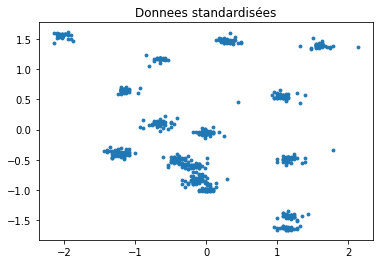

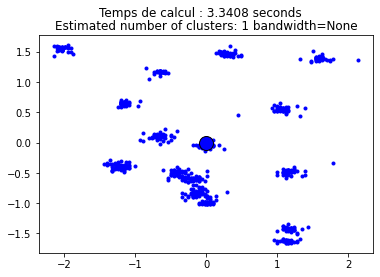

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import metrics
from sklearn.cluster import MeanShift as MeanShift, estimate_bandwidth

from itertools import cycle

import pandas as pd


##################################################################

# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff   xclara.arff
#  2d-4c-no4    spherical_4_3 
# cluto-t8-8k  cluto-t4-8k cluto-t5-8k cluto-t7-8k diamond9 banana

path = './new-data/'
filename = "d64.txt"
# databrut = arff.loadarff(open(path+"banana.arff", 'r'))
databrut = pd.read_csv(path+filename, sep=" ", encoding = "ISO-8859-1", skipinitialspace=True)
# datanp = np.array([[x[0],x[1]] for x in databrut[0]])
datanp = databrut.to_numpy()

########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
#print(f0)
#print(f1)

plt.figure()
plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")

########################################################################
# Run Mean-Shift clustering method 
start = time.time()
bandwidth = None
ms = MeanShift(bandwidth=bandwidth)
ms.fit(data_scaled)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

end = time.time()

print("number of estimated clusters : %d" % n_clusters_)

# Plot

plt.figure()
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(f0_scaled[my_members], f1_scaled[my_members], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: " + str(n_clusters_) + " bandwidth=" + str(bandwidth))
plt.suptitle("Temps de calcul : " + str(round(end - start, 4)) + " seconds")
plt.show()

########################################################################
# FIND "interesting" values of epsilon and min_samples 
# using distances of the k NearestNeighbors for each point of the dataset
#
# Note : a point x is considered to belong to its own neighborhood  
